<a href="https://colab.research.google.com/github/adenikeadewumi/EEE_254/blob/main/Covid19_DeathCase_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I used the COVID-19 in USA dataset

Download wiith the link below

https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-usa?select=us_covid19_daily.csv

In [ ]:
#Importations
from matplotlib import pyplot as plt
import numpy as np

Extract data from zip file


In [ ]:
import zipfile
import os
import pandas as pd

zip_file_path = '/content/archive (15).zip'
extract_path = 'data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Initialize Dataset to use for analysis
covid_by_county= "/content/destination_directory/us_counties_covid19_daily.csv"

Print part of the data set

In [ ]:
df= pd.read_csv(covid_by_county)
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
#Print the dataset's shape
df.shape

(800437, 6)

In [ ]:
#Print the number of unique values in column "state"
df["state"].nunique()

55

In [ ]:
df["state"].unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

Create New dataset of states, no of cases and no of deaths

In [ ]:
#Create new dataset
covid_state= df.groupby("state").agg({"cases": "sum", "deaths": "sum"}) # This gives the sum of cases and death for each unique states
#covid_state= pd.DataFrame(covid_state, columns= ["cases", "deaths"], index=covid_state.index)
covid_state.head()

,cases,deaths
state,,
Alabama,24024159,413394.0
Alaska,1747498,8638.0
Arizona,35564144,845363.0
Arkansas,13267810,203418.0
California,127488272,2479213.0


In [ ]:
#Check for None values in the data set
covid_state.isnull().sum()

,0
cases,0
deaths,0


Plot  a graph to visualize the differnce between number of cases and death realized by each state

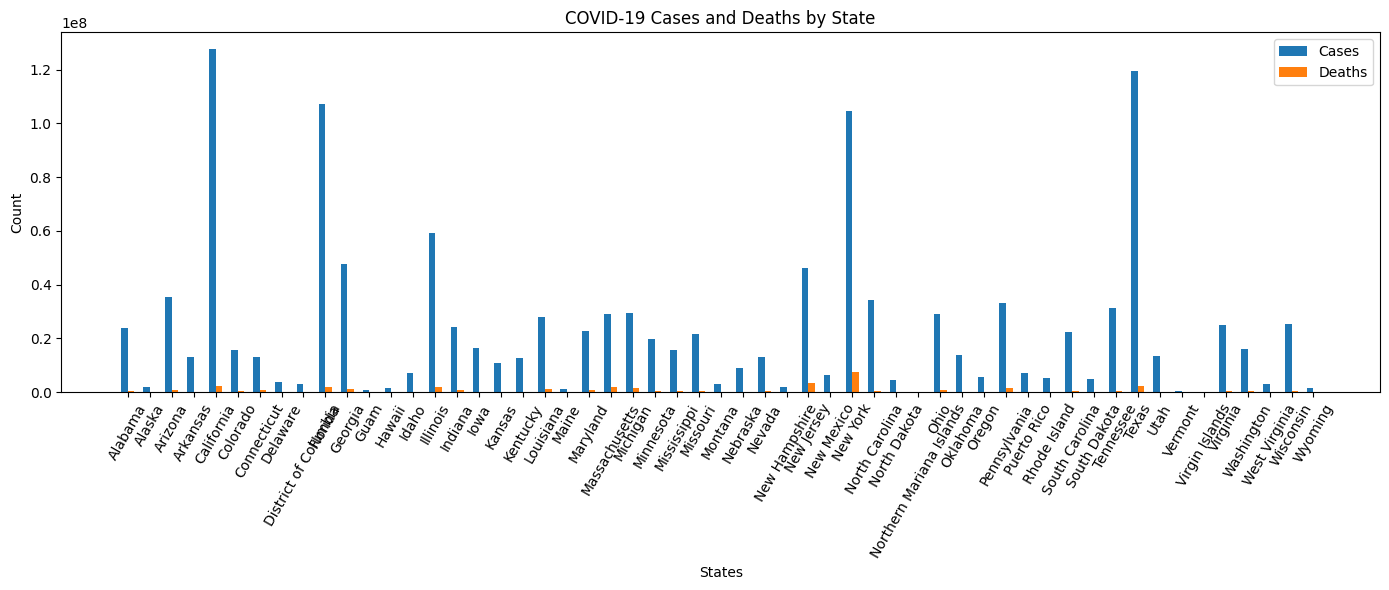

In [ ]:
# Make state a column instead of an index
covid_state = covid_state.reset_index()

x = np.arange(len(covid_state))  # Numeric positions for the states
y1 = covid_state["cases"]
y2 = covid_state["deaths"]

# Set the width of each bar
width = 0.3

fig, ax = plt.subplots(figsize=(14,6))

# Plot bars side by side by shifting them
ax.bar(x - width/2, y1, width=width, label="Cases")
ax.bar(x + width/2, y2, width=width, label="Deaths")

# Set x-ticks to be in the center of the two bars
ax.set_xticks(x)
ax.set_xticklabels(covid_state['state'], rotation=60)

# Labels and title
ax.set_xlabel('States')
ax.set_ylabel('Count')
ax.set_title('COVID-19 Cases and Deaths by State')
ax.legend()

plt.tight_layout()
plt.show()
